In [4]:
import numpy as np
from matplotlib import pyplot as plt
import os
from keras.api.models import Model
from keras.api.layers import Input, Dense, Activation, Flatten
from keras.api.optimizers import Adam
from keras.api.losses import binary_crossentropy
import random
import cv2

In [9]:
work_dir = 'c:/Users/Jalil/Desktop/Ecole/M2TSI/tp2/'

In [5]:
datasetnpy_path = 'datasets/dataset.npy'

In [13]:
dataset_toystory_path = os.path.join(work_dir, 'datasets/Movies/toy_story_1_01')
dataset_ernest_path = os.path.join(work_dir, 'datasets/Movies/ernest_celestine_01')
datasetnpy_path = os.path.join(work_dir, 'datasets/dataset.npy')

dataset = []
for img in os.listdir(dataset_ernest_path):
    dataset.append(plt.imread(os.path.join(dataset_ernest_path, img)))


for img in os.listdir(dataset_toystory_path):
    dataset.append(plt.imread(os.path.join(dataset_toystory_path, img)))

dataset = np.array(dataset)

with open(datasetnpy_path, 'wb') as f:
    np.save(f, dataset)

In [6]:
with open(datasetnpy_path, 'rb') as f:
    dataset = np.load(f)

In [9]:
print(f'dataset_shape : {dataset.shape}')

dataset_shape : (1000, 540, 920, 3)


In [10]:
target = np.zeros(1000)
target[500:] = 1
target = target.reshape((-1,1))

In [11]:
print(f'target_shape : {target.shape}')

target_shape : (1000, 1)


(540, 920, 3)


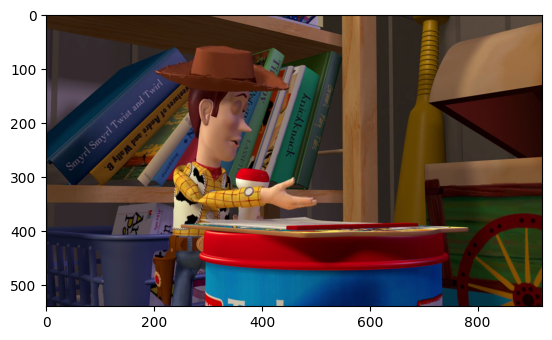

In [12]:
img_test = dataset[710]
print(img_test.shape)
plt.imshow(img_test)

In [54]:
def compute_mean(image):
    image_size = image.shape[0] * image.shape[1] * image.shape[2]
    
    return (np.sum(image.flatten())/image_size)

def compute_mean_canal(image):
    image_size = image.shape[0] * image.shape[1] * image.shape[2]
    
    r_mean = np.mean(image[:,:,0])
    g_mean = np.mean(image[:,:,1])
    b_mean = np.mean(image[:,:,2])
    
    return r_mean, g_mean, b_mean

def extract_histogram(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return np.histogram(image_gray, bins=10)

def extract_frequencies(image, nb_freq):
    frequencies = []
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    fft = np.fft.fft2(gray_image)
    fft_shift = np.fft.fftshift(fft)
    mod = np.abs(fft_shift).flatten()
    mod_norm = mod / 7.89 * np.power(10,12)
    
    hist = np.histogram(np.log10(mod), bins=5)
    

    return hist
        
        

vecteur features : [moyenne, moyenne rgb, histogramme de l'image, histogramme des frequences,]

In [55]:
print(extract_histogram(img_test))

(array([ 59281, 186077, 103852,  73049,  41908,  19507,   6370,   4396,
         2085,    275], dtype=int64), array([0.        , 0.09932942, 0.19865884, 0.29798827, 0.39731768,
       0.4966471 , 0.59597653, 0.69530594, 0.79463536, 0.89396477,
       0.9932942 ], dtype=float32))


In [56]:
print(np.log10(1000000000000000000))

18.0


In [57]:
print(extract_frequencies(img_test, 100))

(array([  4839, 298766, 189310,   3858,     27], dtype=int64), array([-1.57255466, -0.24905296,  1.07444874,  2.39795045,  3.72145215,
        5.04495385]))


In [8]:
carac_vector = np.zeros(len(dataset))
for i, image in enumerate(dataset):
    carac_vector[i] = compute_mean(image)

carac_vector = carac_vector.reshape((1,-1))
print(f'carac vector shape : {carac_vector.shape}')

carac vector shape : (1, 1000)


In [9]:
y_tab = np.random.choice([0,1], size=(1000,))
print(y_tab.shape)

(1000,)


In [10]:
input = Input(shape=(540,920,3))
x = Flatten()(input)
x = Dense(units=32, activation='relu')(x)
x = Dense(units=16, activation='relu')(x)
output = Dense(units=1, activation='sigmoid')(x)

model = Model(input, output)

In [11]:
model.summary()
optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss=binary_crossentropy, metrics=['accuracy'])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 540, 920, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1490400)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │    47,692,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,693,377 (181.94 MB)

 Trainable params: 47,693,377 (181.94 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(dataset, y_arr, epochs=5, batch_size=16, shuffle=True)

Epoch 1/5
18/63 ━━━━━━━━━━━━━━━━━━━━ 18s 415ms/step - accuracy: 0.4919 - loss: 332.4404

KeyboardInterrupt: 

In [95]:
model.evaluate(dataset)